In [7]:
import torch

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('../datasets/admission_predict.csv')
# discretize the continuous numeric Chance of Admit column into a categorical one (low/medium/high probability)
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [10]:
data = data.rename(index=str, columns={'Chance of Admit ': 'Admit_Probability'})
data = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Admit_Probability']]

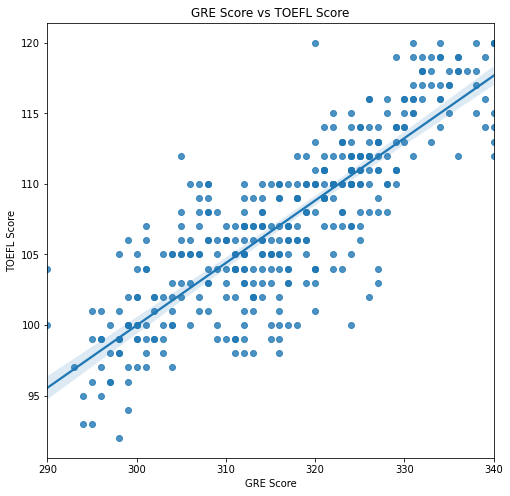

In [15]:
#EXPLORING THE DATASET

plt.figure(figsize=(8,8))

fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=data)
plt.title("GRE Score vs TOEFL Score")

plt.show()

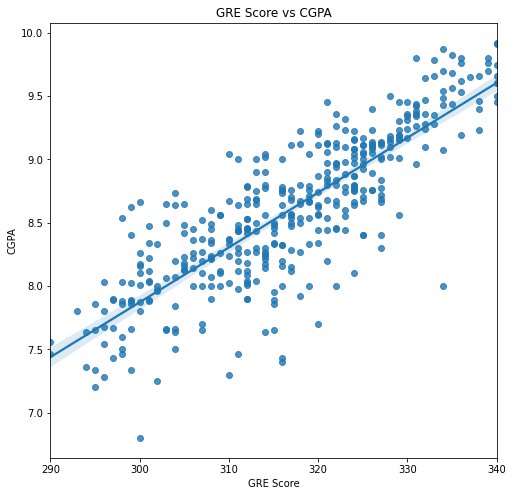

In [16]:
plt.figure(figsize=(8,8))

fig = sns.regplot(x="GRE Score", y="CGPA", data=data)
plt.title("GRE Score vs CGPA")

plt.show()

Text(0, 0.5, 'CGPA')

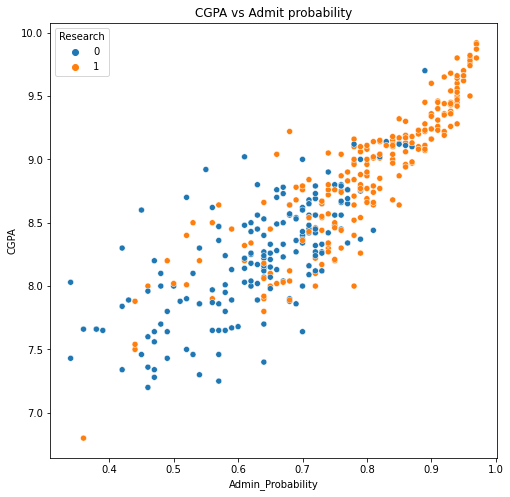

In [13]:
plt.figure(figsize=(8,8))

fig = sns.scatterplot(x='Admit_Probability', y='CGPA', data=data, hue='Research')

plt.title('CGPA vs Admit probability')

plt.xlabel('Admin_Probability')
plt.ylabel('CGPA')

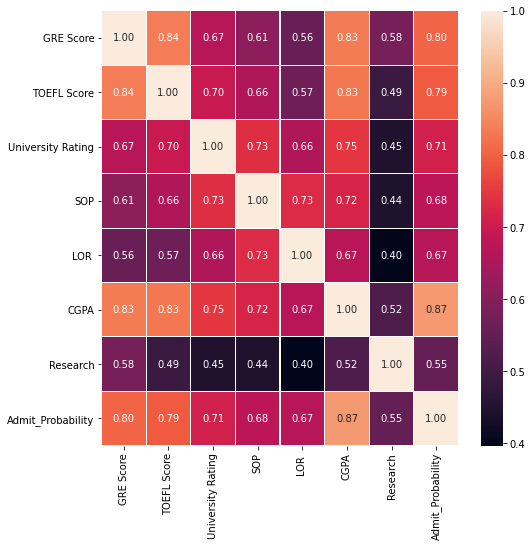

In [14]:
plt.figure(figsize=(8,8))

sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt='.2f')

plt.show()

In [18]:
#PREPROCESSING THE DATA

from sklearn import preprocessing

In [19]:
# standardize the numeric data to have zero mean and unit variance
# subtracting the mean of every feature from all values of the feature and dividing by the std. deviation 
# neural networks perform better with standardized data
data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']] = \
    preprocessing.scale(data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']])

In [29]:
# we'll leave out university rating -> doesn't affect students' chance to be admitted
col = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']
features = data[col]

# we have to discretize the continous numeric column into categories
target = data[['Admit_Probability']]

y = target.copy()

In [35]:
y.replace(target[target >= 0.80], 2)
y.replace(target[target >= 0.60], 1)                             
y.replace(target[target < 0.60], 0)

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [ ]:
target = y

# unique values of the columns are just 3 after the discretization
target['Admit_Probability'].unique()